## Load Data
Set the Hadoop configuration.

In [34]:
def set_hadoop_config(credentials):
    prefix = "fs.swift.service." + credentials['name'] 
    hconf = sc._jsc.hadoopConfiguration()
    hconf.set(prefix + ".auth.url", credentials['auth_url']+'/v2.0/tokens')
    hconf.set(prefix + ".auth.endpoint.prefix", "endpoints")
    hconf.set(prefix + ".tenant", credentials['project_id'])
    hconf.set(prefix + ".username", credentials['user_id'])
    hconf.set(prefix + ".password", credentials['password'])
    hconf.setInt(prefix + ".http.port", 8080)
    hconf.set(prefix + ".region", credentials['region'])
    hconf.setBoolean(prefix + ".public", True)

In [35]:
credentials = {}
credentials['name'] = 'keystone'
credentials['auth_url'] = 'https://identity.open.softlayer.com'
credentials['project_id'] = '7478035080e04c179e6629b03e72b0fb'
credentials['region'] = 'dallas'
credentials['user_id'] = '834fc7a5dfdd44a4a7a9902e23124365'
credentials['password'] = 'v3XC6Ru[Y!Oa-uxb'

In [36]:
set_hadoop_config(credentials)

In [37]:
data = sc.textFile("swift://notebooks.keystone/NYPD_Motor_Vehicle_Collisions.csv")

## Parse Data

In [38]:
dataParse = data.map(lambda line : line.split(","))

## Clean Data

In [39]:
dataParse = dataParse.filter(lambda x: len(x) > 19 and x[19] and x[19] != "Unspecified")

In [40]:
# dataParse.top(10)
# len(dataParse.first())

## Explore Data
Accident Data Values

In [41]:
# x[19] CONTRIBUTING FACTOR VEHICLE 1
crashByKey = dataParse.map(lambda x : (x[19], 1))

In [42]:
crashByKey.top(10)

[(u'Windshield Inadequate', 1),
 (u'Windshield Inadequate', 1),
 (u'Windshield Inadequate', 1),
 (u'Windshield Inadequate', 1),
 (u'Windshield Inadequate', 1),
 (u'Windshield Inadequate', 1),
 (u'Windshield Inadequate', 1),
 (u'Windshield Inadequate', 1),
 (u'Windshield Inadequate', 1),
 (u'Windshield Inadequate', 1)]

In [43]:
crashReducedByKey = crashByKey.reduceByKey(lambda v1,v2 : v1 + v2)

In [44]:
crashTop10=[]
boroughTop10=[]
for pair in crashReducedByKey.map(lambda (x,y) : (y,x)).top(10):
    crashTop10.append(pair[0])
    boroughTop10.append(pair[1])
    print "Reason %s had crashes of %d" % (pair[1],pair[0])

Reason Driver Inattention/Distraction had crashes of 75452
Reason Fatigued/Drowsy had crashes of 34635
Reason Failure to Yield Right-of-Way had crashes of 26968
Reason Other Vehicular had crashes of 22394
Reason Backing Unsafely had crashes of 16744
Reason Turning Improperly had crashes of 15235
Reason Lost Consciousness had crashes of 15003
Reason Prescription Medication had crashes of 12041
Reason Traffic Control Disregarded had crashes of 7734
Reason Driver Inexperience had crashes of 7711


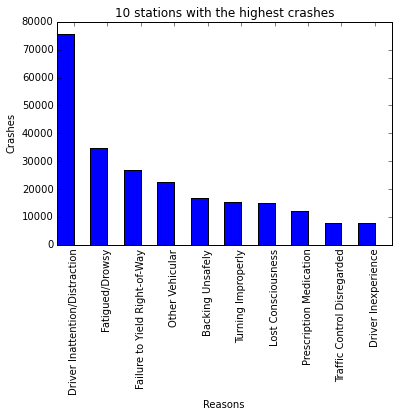

In [45]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 10
index = np.arange(N)  
bar_width = 0.5

plt.bar(index, crashTop10, bar_width,
                 color='b')
plt.xlabel('Reasons')
plt.ylabel('Crashes')
plt.title('10 stations with the highest crashes')
plt.xticks(index + bar_width, boroughTop10, rotation=90)
plt.show()